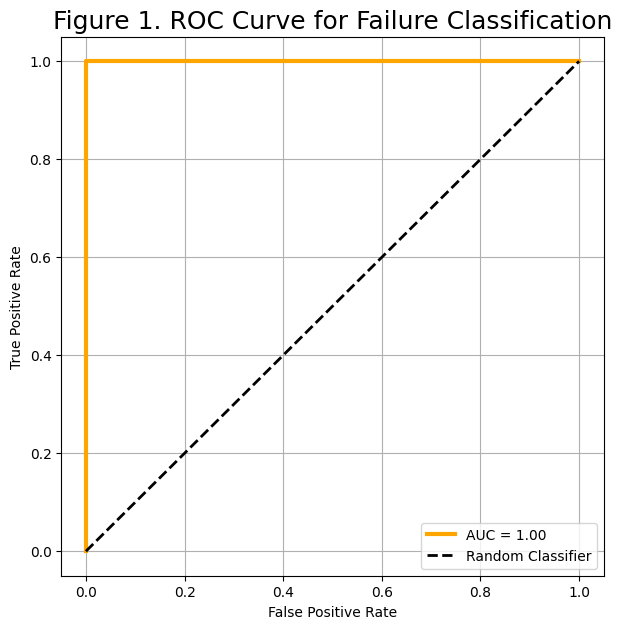

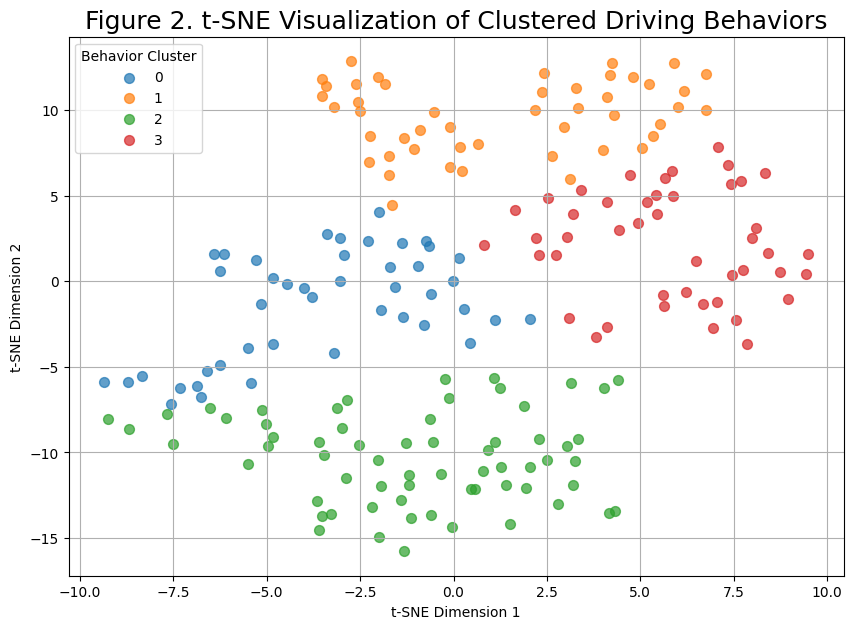

In [ ]:
# Install required libraries (if not already installed)
!pip install scikit-learn matplotlib seaborn --quiet

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Set random seed for reproducibility
np.random.seed(42)

# -------------------------------
# Figure 1: ROC Curve for Failure Classification
# -------------------------------

# Generate synthetic classification data
X, y = make_classification(n_samples=200, n_features=10, n_informative=5, n_redundant=2, random_state=42)

# Train a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)
y_proba = clf.predict_proba(X)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, color='orange', lw=3, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 1. ROC Curve for Failure Classification', fontsize=18)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# -------------------------------
# Figure 2: t-SNE Visualization of Clustered Driving Behaviors
# -------------------------------

# Use t-SNE to reduce dimensionality to 2D for visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Cluster the t-SNE features using KMeans
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_tsne)

# Plot t-SNE with cluster labels
plt.figure(figsize=(10, 7))
palette = sns.color_palette("tab10", n_clusters)
for cluster in range(n_clusters):
    plt.scatter(
        X_tsne[clusters == cluster, 0],
        X_tsne[clusters == cluster, 1],
        label=f'{cluster}',
        s=50,
        alpha=0.7
    )
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Figure 2. t-SNE Visualization of Clustered Driving Behaviors', fontsize=18)
plt.legend(title='Behavior Cluster')
plt.grid(True)
plt.show()


Model Comparison Table:
               Model  Accuracy  Precision  Recall  F1-score  ROC-AUC
0      Random Forest     0.867      0.831   0.891     0.860    0.929
1  Gradient Boosting     0.875      0.823   0.927     0.872    0.916
2   SVM (RBF Kernel)     0.842      0.833   0.818     0.826    0.922


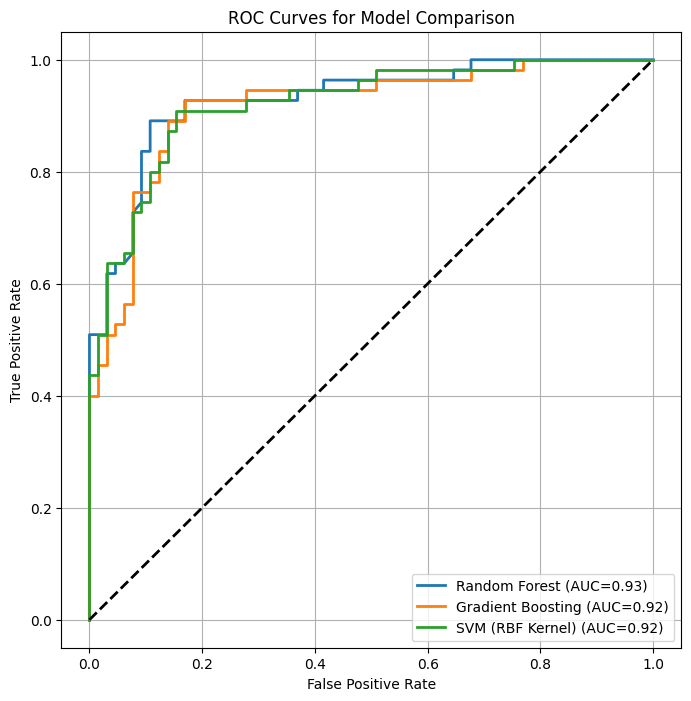

In [ ]:
# Install required libraries (if not already installed)
!pip install scikit-learn matplotlib seaborn --quiet

import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
)

# Generate synthetic data (replace with your real data)
X, y = make_classification(n_samples=400, n_features=10, n_informative=5, n_redundant=2, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42),
    "SVM (RBF Kernel)": SVC(kernel='rbf', C=1.0, probability=True, random_state=42)
}

# Train, predict, and evaluate each model
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    })

# Display results in a DataFrame
results_df = pd.DataFrame(results)
print("Model Comparison Table:")
print(results_df.round(3))

# Optional: Plot ROC curves for all models
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC={roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Model Comparison')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Suppose X is your feature matrix (e.g., from t-SNE or original features)
# If you have ground truth labels (for ARI/NMI), set y_true; else, skip those metrics

# Example: KMeans clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Silhouette Score
sil_score = silhouette_score(X, kmeans_labels)
# Davies-Bouldin Index
db_score = davies_bouldin_score(X, kmeans_labels)
# Calinski-Harabasz Index
ch_score = calinski_harabasz_score(X, kmeans_labels)

print(f"KMeans Silhouette Score: {sil_score:.3f}")
print(f"KMeans Davies-Bouldin Index: {db_score:.3f}")
print(f"KMeans Calinski-Harabasz Index: {ch_score:.3f}")

# If you have ground truth labels (y_true), you can also compute:
# y_true = ... # your true labels
# ari = adjusted_rand_score(y_true, kmeans_labels)
# nmi = normalized_mutual_info_score(y_true, kmeans_labels)
# print(f"KMeans Adjusted Rand Index: {ari:.3f}")
# print(f"KMeans Normalized Mutual Information: {nmi:.3f}")

# Example: DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Filter out noise points (-1 label) for silhouette score
mask = dbscan_labels != -1
if len(set(dbscan_labels[mask])) > 1:
    sil_score_dbscan = silhouette_score(X[mask], dbscan_labels[mask])
    db_score_dbscan = davies_bouldin_score(X[mask], dbscan_labels[mask])
    ch_score_dbscan = calinski_harabasz_score(X[mask], dbscan_labels[mask])
    print(f"DBSCAN Silhouette Score: {sil_score_dbscan:.3f}")
    print(f"DBSCAN Davies-Bouldin Index: {db_score_dbscan:.3f}")
    print(f"DBSCAN Calinski-Harabasz Index: {ch_score_dbscan:.3f}")
else:
    print("DBSCAN did not find more than one cluster (excluding noise).")


KMeans Silhouette Score: 0.193
KMeans Davies-Bouldin Index: 1.545
KMeans Calinski-Harabasz Index: 92.528
DBSCAN did not find more than one cluster (excluding noise).
